In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score#회귀평가
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report#분류평가

In [ ]:
df_mpg=sns.load_dataset('mpg')
df_mpg

In [ ]:
X=df_mpg.drop(['mpg'],axis=1)
y=df_mpg['mpg']

In [ ]:
X=X.iloc[:,:7]
c_l=[]
for i in X.columns:
  if X[i].nunique()<20:
    c_l.append(i)
X=X.astype(dict.fromkeys(c_l,'category'))
X=X.astype(dict.fromkeys([i for i in X.columns if i not in c_l],'float64'))
X.dropna(inplace=True)
d=pd.merge(X,y,right_index=True,left_index=True)
X=d.drop(['mpg'],axis=1)
y=d['mpg'].values
X.info()

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
pr_m=make_column_transformer((StandardScaler(), make_column_selector(dtype_include='float64')),
 (OneHotEncoder(), make_column_selector(dtype_include='category')))
pr_m.fit(X)

In [ ]:
s_X=pd.DataFrame(pr_m.transform(X).toarray(),columns=pr_m.get_feature_names_out())
s_X

In [ ]:
m=LinearRegression()
m.fit(s_X,y)
m.score(s_X,y)

In [ ]:
def 추가입력_전처리기(df,s,c_l,y_name):
  구성정보=df.drop([i for i in df.columns.to_list()if i not in s.feature_names_in_],axis=1).columns.to_list()
  print(f'{구성정보}를 입력하시오.')
  in_l={}
  for i in 구성정보:
    in_d=input(f'{i}:')
    if in_d.isdigit():
      in_l[i]=[eval(in_d)]
    else:
      in_l[i]=[in_d]
  X=pd.DataFrame(in_l)
  X=X.astype(dict.fromkeys(c_l,'category'))
  X=X.astype(dict.fromkeys([i for i in X.columns if i not in c_l],'float64'))
  out_x=s.transform(X)
  return out_x.toarray()

In [ ]:
def 동작기(df,s,m,c_l_d,y_name='mpg'):
  X=추가입력_전처리기(df,s,c_l,y_name)
  return m.predict(X)[0]

In [ ]:
print(동작기(df_mpg,pr_m,m,c_l,y_name='mpg'))

In [ ]:
df_iris=sns.load_dataset('iris')
df_iris

In [ ]:
X=df_iris.drop(['species'],axis=1).values
y=df_iris['species'].values

In [ ]:
ss=StandardScaler()
s_X=ss.fit_transform(X)
s_X

In [ ]:
m=LogisticRegression()
m.fit(s_X,y)

In [ ]:
X[:1]

In [ ]:
def 추가입력_전처리기(df,s,y_name):
  구성정보=df.drop([y_name],axis=1).columns.to_list()
  print(f'{구성정보}를 입력하시오.')
  in_l=[]
  for i in 구성정보:
    in_l.append(eval(input(f'{i}:')))
  X=[in_l]
  out_x=s.transform(X)
  return out_x

In [ ]:
def 동작기(df,s,m,y_name='species'):
  X=추가입력_전처리기(df,s,y_name)
  return m.predict(X)[0]

In [ ]:
print(동작기(df_iris,ss,m))

In [5]:
df=pd.read_csv("data5.csv")
df

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [6]:
df[df['class_buys_computer']=='yes']

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
6,middle_aged,low,yes,excellent,yes
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes
10,youth,medium,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [9]:
df[df['class_buys_computer']=='no']

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
5,senior,low,yes,excellent,no
7,youth,medium,no,fair,no
13,senior,medium,no,excellent,no


In [18]:
def get_info(df):
  nbuy=df[df['class_buys_computer']=='no']
  buy=df[df['class_buys_computer']=='yes']
  x=np.array([len(buy)/len(df),len(nbuy)/len(df)])
  y=np.log2(x[x!=0])
  all_i=-sum(x[x!=0]*y)
  return all_i

In [19]:
get_info(df)

0.9402859586706311

In [21]:
df['age'].unique()

array(['youth', 'middle_aged', 'senior'], dtype=object)

In [23]:
#age
def get_a_info(df,a_n):
  a_v=df[a_n].unique()
  get_i=[]
  for i in a_v:
    s_df=df[df[a_n]==i]
    get_i.append((len(s_df)/len(df))*get_info(s_df))
  return sum(get_i)

In [28]:
[i for i in df.columns if i !='class_buys_computer']

['age', 'income', 'student', 'credit_rating']

In [29]:
for i in [i for i in df.columns if i !='class_buys_computer']:
  print(f'{i}:{get_info(df)-get_a_info(df,i)}')

age:0.24674981977443933
income:0.02922256565895487
student:0.15183550136234159
credit_rating:0.04812703040826949


In [35]:
l=[]
for i in df.age.unique():
  l.append(df[df.age==i])
l[0]

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
10,youth,medium,yes,excellent,yes


In [36]:
l[1]

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
6,middle_aged,low,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [37]:
l[2]

,age,income,student,credit_rating,class_buys_computer
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
9,senior,medium,yes,fair,yes
13,senior,medium,no,excellent,no


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

In [39]:
df1=pd.read_csv('data4.csv')

In [41]:
X=df1.drop(['class'],axis=1)
y=df1['class']
X.shape,y.shape

((6497, 3), (6497,))

<BarContainer object of 2 artists>

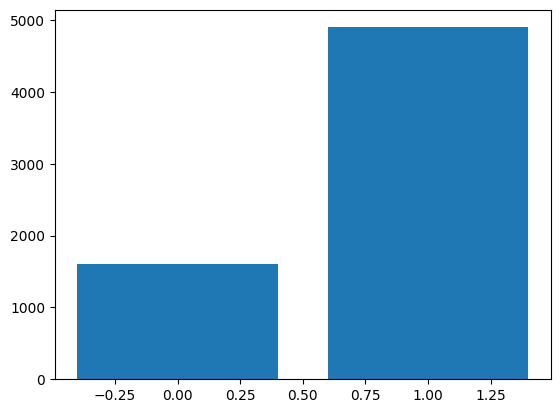

In [46]:
plt.bar([0,1],[len(y[y==0]),len(y[y==1])])

<BarContainer object of 2 artists>

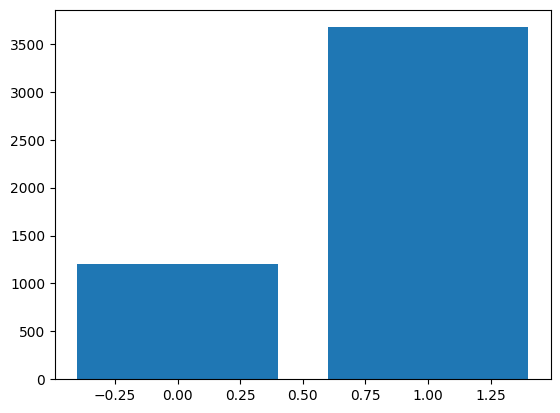

In [51]:
plt.bar([0,1],[len(tr_y[tr_y==0]),len(tr_y[tr_y==1])])

In [53]:
X_data,tt_x,y_data,tt_y=train_test_split(X,y,random_state=10,test_size=0.3)
tr_x,val_x,tr_y,val_y=train_test_split(X_data,y_data,random_state=10,test_size=0.2)

In [54]:
tr_x.shape,val_x.shape,tt_x.shape,tr_y.shape,val_y.shape,tt_y.shape

((3637, 3), (910, 3), (1950, 3), (3637,), (910,), (1950,))

In [56]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
m.fit(tr_x,tr_y)
m.score(tr_x,tr_y),m.score(val_x,val_y),m.score(tt_x,tt_y)

(0.9980753368160572, 0.8681318681318682, 0.8471794871794872)

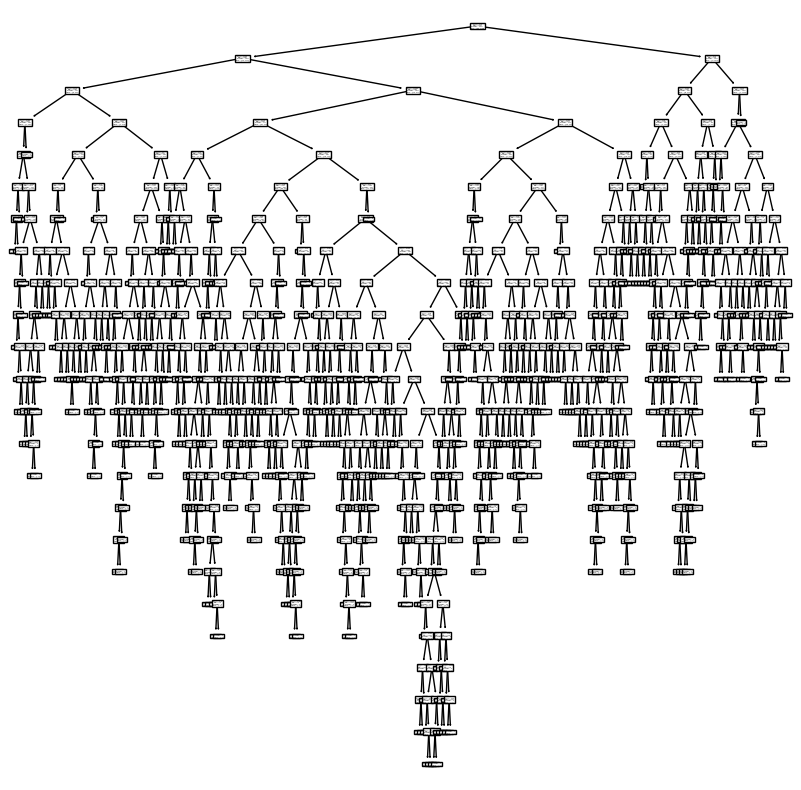

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(m)
plt.show()

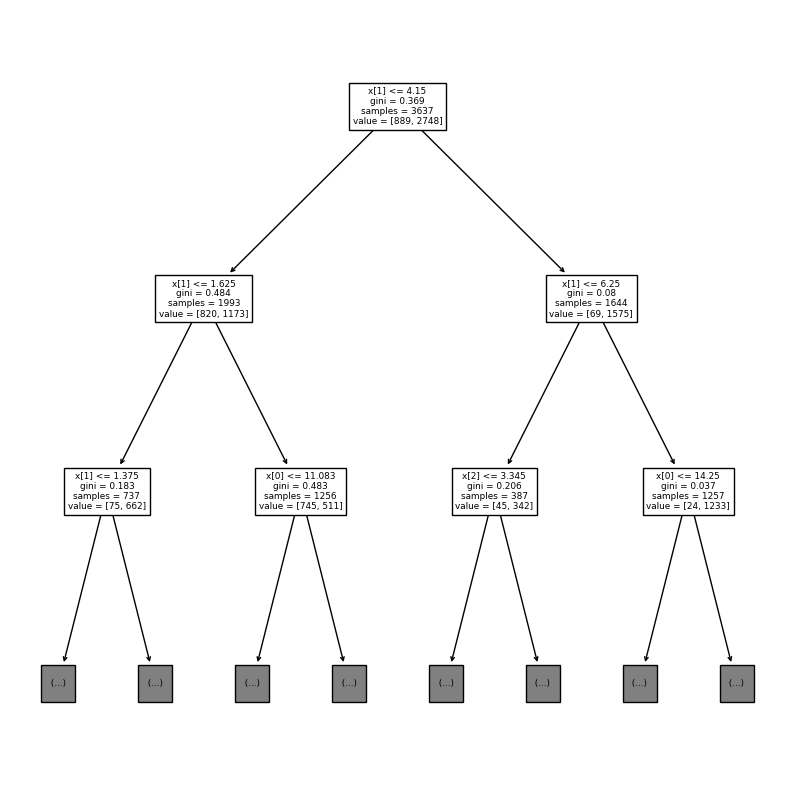

In [59]:
plt.figure(figsize=(10,10))
plot_tree(m,max_depth=2)
plt.show()

In [ ]:
#모수 선형회귀
#비모수 KNN , 의사결정트리
#세미모수 SVM 마진, 인공신경망 뉴런

In [3]:
from sklearn
import seaborn as sns
df=sns.load_dataset('iris')
X=df.drop(['species'],axis=1)
y=df['species']
#사전 가지치기
m=DecisionTreeClassifier()
#사후 가지치기
m.fit(X,y)

NameError: ignored

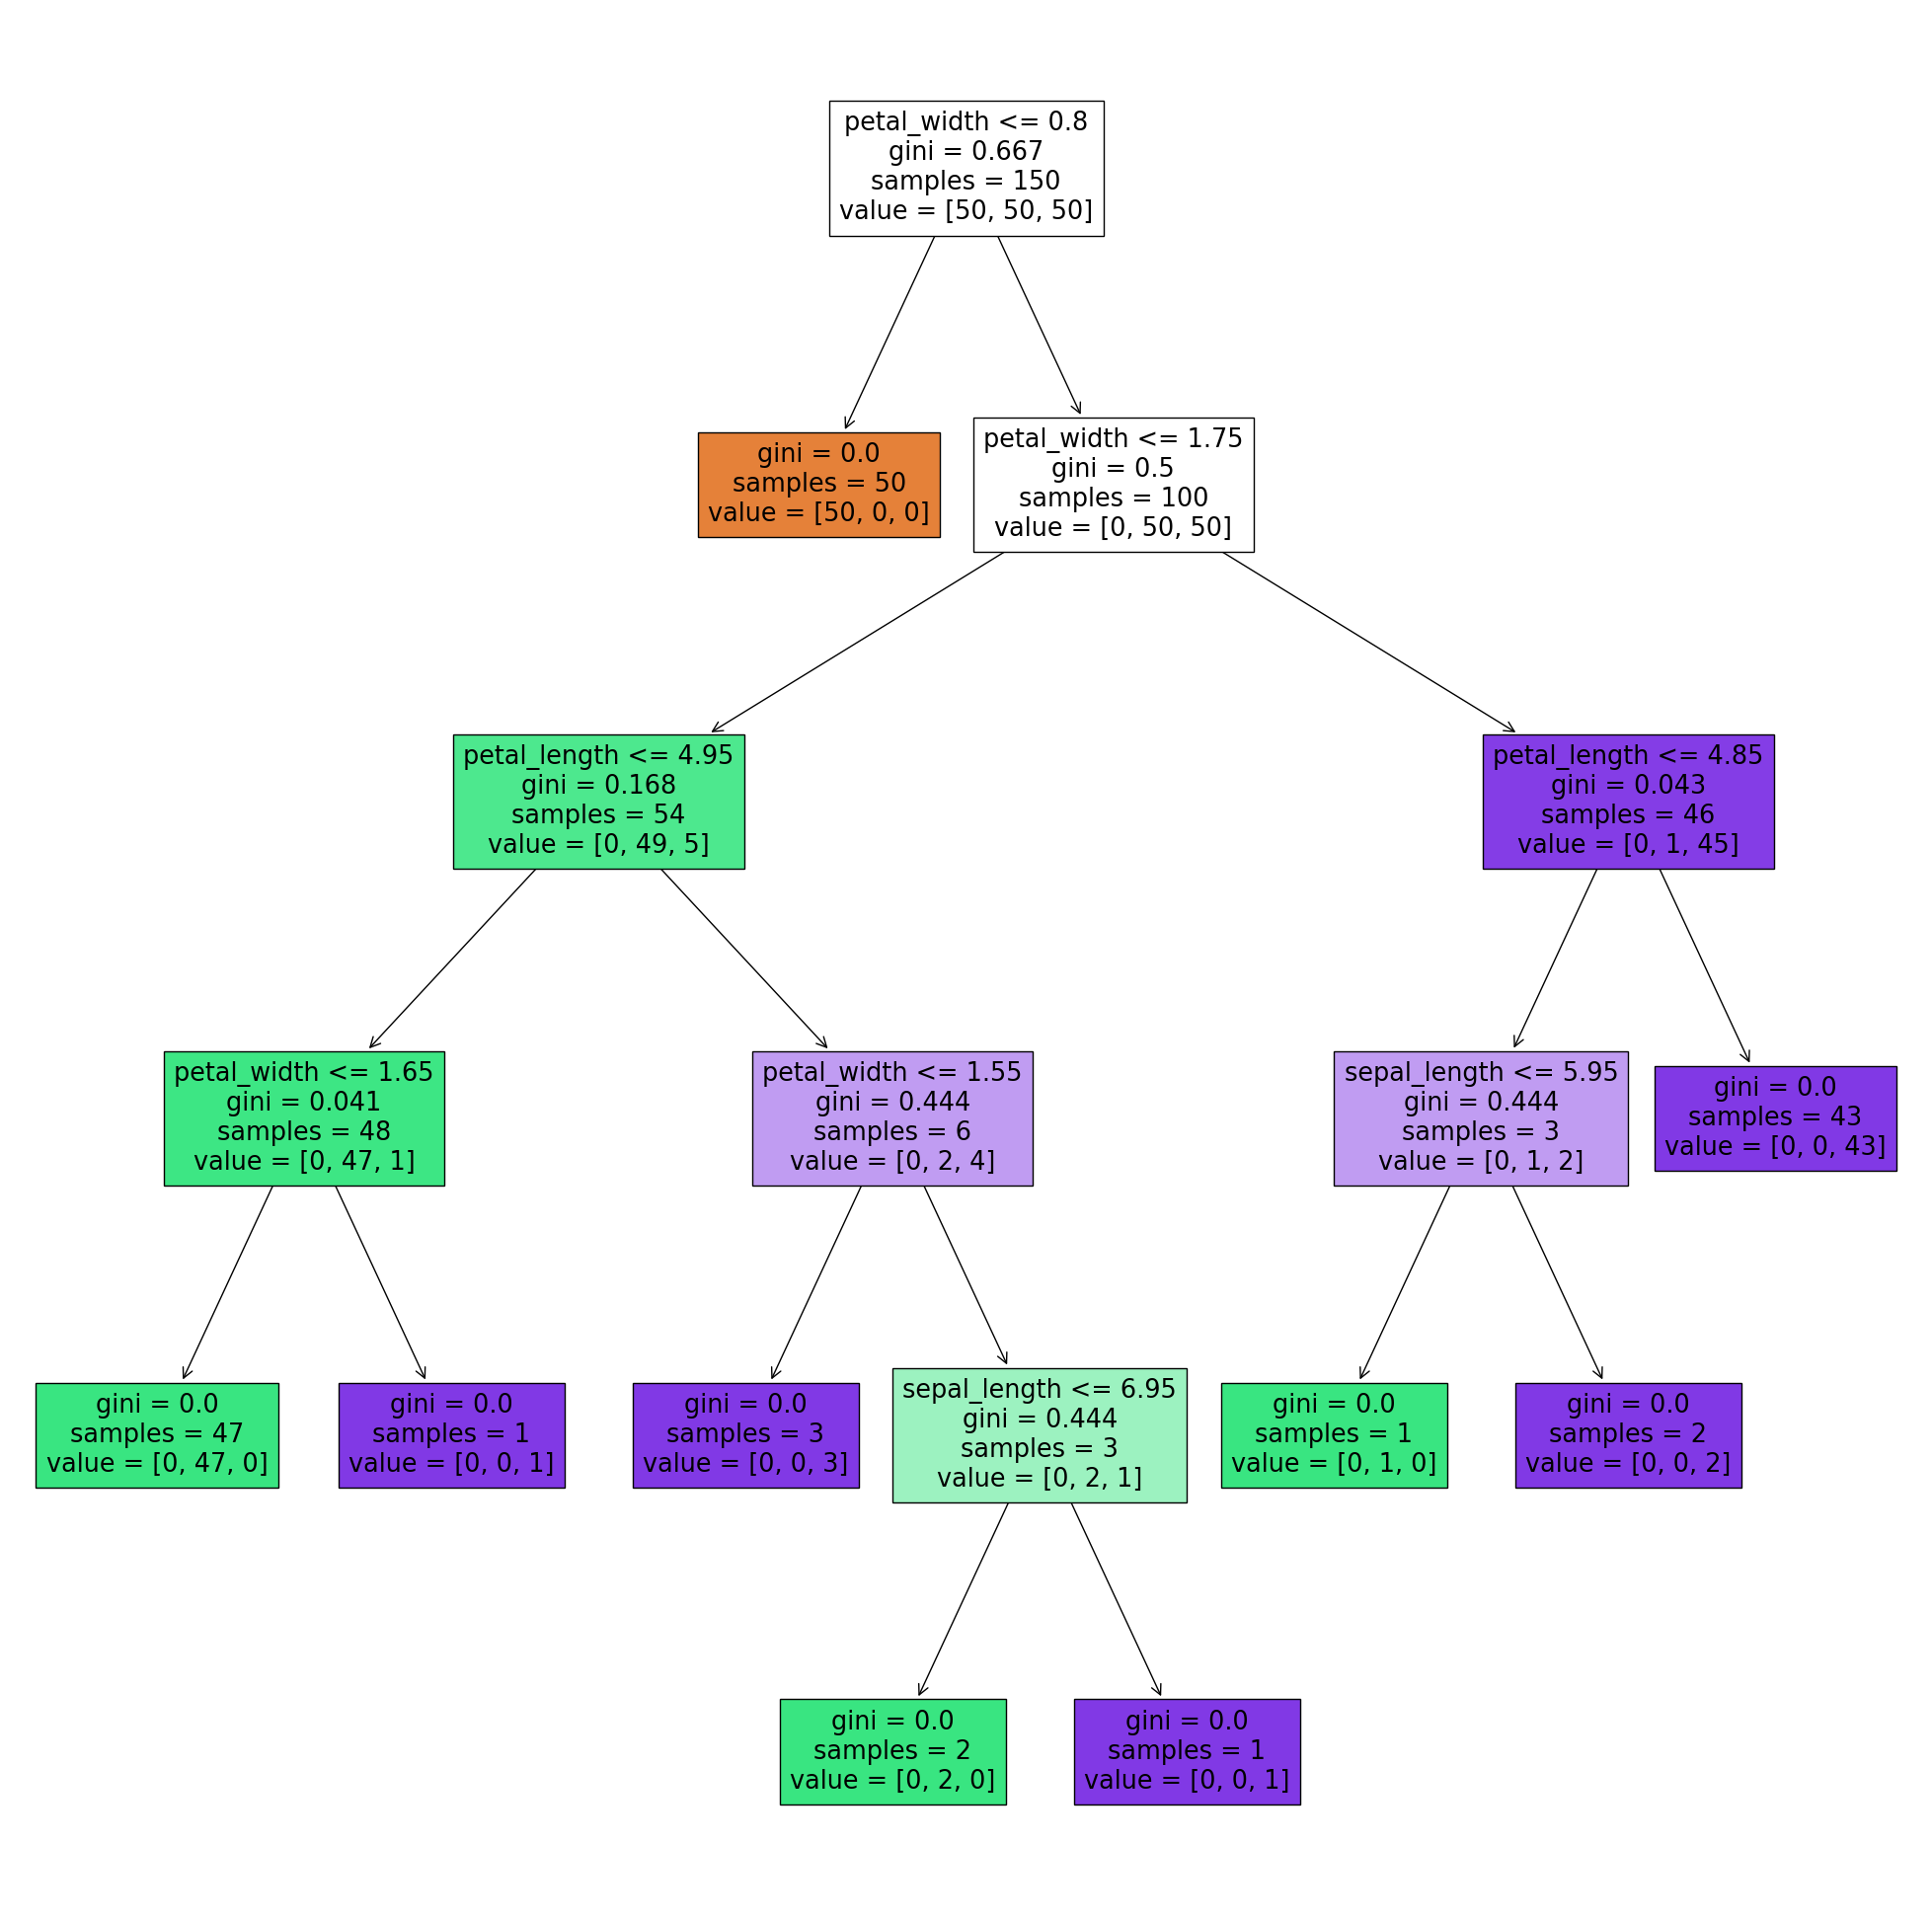

In [67]:
plt.figure(figsize=(25,25))
plot_tree(m,feature_names=X.columns,filled=True)
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
df=sns.load_dataset('iris')
X=df.drop(['species'],axis=1)
y=df['species']
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,test_size=0.3)
#tr_x,val_x,tr_y,val_y=train_test_split(tr_x,tr_y,test_size=0.2)
#tr_x.shape,tr_y.shape,tt_x.shape,tt_y.shape,val_x.shape,val_y.shape

In [11]:
s=StandardScaler().fit(tr_x)
s_tr_x=s.transform(tr_x)
s_tt_x=s.transform(tt_x)
s_tr_y=tr_y.values
s_tt_y=tt_y.values

In [12]:
m1=LogisticRegression()
m2=SGDClassifier()
m3=KNeighborsClassifier()
m4=DecisionTreeClassifier()
m5=SVC()

In [ ]:
for i in [m1,m2,m3,m4,m5]:
  print(i,cross_val_score(i,tr_x,tr_y).mean())

In [30]:
p={}
for i in [m1,m3,m4,m5]:
  p[str(i)]={}
p

{'LogisticRegression()': {},
 'KNeighborsClassifier()': {},
 'DecisionTreeClassifier()': {},
 'SVC()': {}}

In [ ]:
LogisticRegression()

In [34]:
p['LogisticRegression()']['C']=[1,2,3,4,5,6,7,8,9]
p['KNeighborsClassifier()']['n_neighbors']=[1,2,3,4,5,6,7,8,9]
p['DecisionTreeClassifier()']['max_depth']=[1,2,3,4,5]
p['SVC()']['C']=[1,2,3,4,5,6,7,8,9]

In [35]:
p

{'LogisticRegression()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'KNeighborsClassifier()': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'DecisionTreeClassifier()': {'max_depth': [1, 2, 3, 4, 5]},
 'SVC()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}}

In [ ]:
m_l=[]
for i in [m1,m3,m4,m5]:
  gs=GridSearchCV(i,p[str(i)])
  gs.fit(tr_x,tr_y)
  gs.best_estimator_
  m_l.append(gs)
m_l

In [41]:
for m in m_l:
  print(m,m.best_params_,m.best_score_,m.best_index_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'C': 1} 0.9619047619047618 0
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'n_neighbors': 5} 0.9619047619047618 4
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}) {'max_depth': 4} 0.9428571428571428 3
GridSearchCV(estimator=SVC(), param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'C': 5} 0.980952380952381 4


In [42]:
Lm=m_l[0].best_estimator_
Km=m_l[1].best_estimator_
DTm=m_l[2].best_estimator_
SVm=m_l[3].best_estimator_

In [47]:
m1=LogisticRegression(C=1)
m2=KNeighborsClassifier(n_neighbors=5)
m3=DecisionTreeClassifier(max_depth=4)
m4=SVC(C=5)

In [50]:
for i in [m1,m2,m3,m4]:
  print(i,cross_val_score(i,tr_x,tr_y).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1) 0.9619047619047618
KNeighborsClassifier() 0.9619047619047618
DecisionTreeClassifier(max_depth=4) 0.9333333333333333
SVC(C=5) 0.980952380952381


In [45]:
from sklearn.ensemble import VotingRegressor,VotingClassifier,BaggingClassifier,BaggingRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
#VotingClassifier()

In [54]:
VotingClassifier([('Lm',m1),('Km',m2),('Dm',m3),('SVm',m4)])

VotingClassifier(estimators=[('Lm', LogisticRegression(C=1)),
                             ('Km', KNeighborsClassifier()),
                             ('Dm', DecisionTreeClassifier(max_depth=4)),
                             ('SVm', SVC(C=5))])

In [57]:
e_m=VotingClassifier([('Lm',m1),('Km',m2),('SVm',m4)])
cross_val_score(e_m,tr_x,tr_y).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9619047619047618